<h1><center>Programming Exercise 6:<br>Support Vector Machines</center></h1>

In [4]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import svm
import L67Data

mpl.rcParams['figure.figsize'] = (10,6)

# 1. Support Vector Machines
- Use SVMs with various example 2D dataset

## 1.1 Examples Dataset 1
- The data in `ex6data1.mat` can be separated by a linear boundary. The positions of the positive examples (+) and the negative examples (o) suggest a natural separation indicated by the gap. However, there is an outlier positive example on the far left at about (0.1,0.4). We will see how this outlier affects the SVM decision boundary

In [5]:
data1 = loadmat('ex6data1.mat')
X = data1['X'] # no need to add the bias terms, the svm object does it internally
y = data1['y'].flatten() # output labels

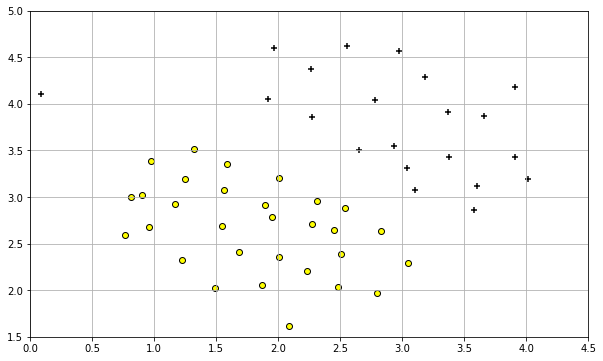

In [7]:
plt.figure()
plt.grid(True)
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='+',edgecolors='k',facecolor='k')
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',edgecolors='k',facecolor='yellow')
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.show()

- Try different values of the $C$ parameter with SVMs
- Informally $C$ is a positive value that controls the penalty for misclassified training examples. A large $C$ parameters tells the SVM to try to classify all examples correctly. $C$ plays a role similar to $1/\lambda$, the reg. parameter for logistic regression
- Train the SVM with both $C=1$ and $C=100$
- We use an SVM from the sklearn library

In [8]:
svc = svm.SVC(C=1.0,kernel='linear') # initialize linear SVM instance

In [9]:
svc.fit(X,y) # train classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- Perform prediction over grid:

In [10]:
# Create a mesh to plot in
h = .02  # Step size in the mesh
x_min, x_max = 0, 4.5
y_min, y_max = 1.5, 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh
z_svc = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
z_svc = z_svc.reshape(xx.shape)

- Plot over mesh but first make a custom colormap since we want to plot the two classes as either yellow ($y=0$) or black ($y=1$)

In [21]:
yellow_black = L67Data.make_colormap(['yellow','k'])

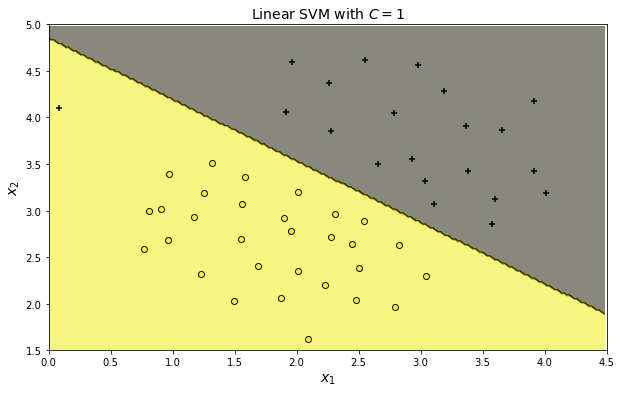

In [25]:
plt.figure()
#cs = plt.contour(xx,yy,z_svc,levels=[0],colors='b',linestyles='-',linewidths=2) # explicitly plot decision boundary
# plt.clabel(cs, fmt = '%2.1d', colors = 'b', fontsize=14) # label decision boundary contour line
csf = plt.contourf(xx,yy,z_svc,cmap=yellow_black,alpha=0.5) # classified feature space
#plt.colorbar(csf)
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='+',edgecolors='k',facecolor='k')
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',edgecolors='k',facecolor='yellow')
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.title(r'Linear SVM with $C=1$',fontsize=14)
plt.show()

- As we can see, this corresponds to somewhat of an "underfit" i.e the + point around (0.1,0.4) is not classified correctly. This is expected since $C$ is small
- Now let's try $C=100$:

In [27]:
svc = svm.SVC(C=100.0,kernel='linear') 
svc.fit(X,y)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
# Plot the decision boundary. For that, we will assign a color to each point in the mesh
z_svc = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
z_svc = z_svc.reshape(xx.shape)

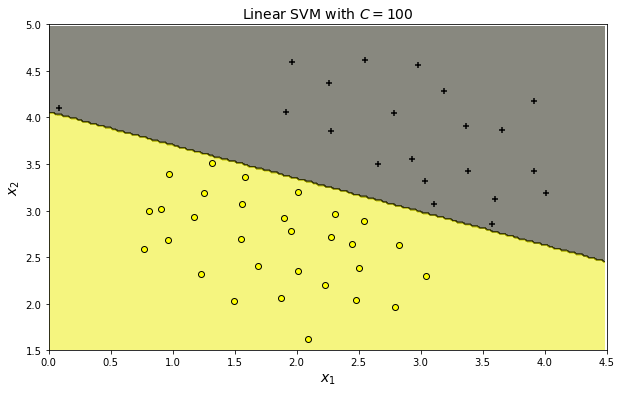

In [29]:
plt.figure()
#cs = plt.contour(xx,yy,z_svc,levels=[0],colors='b',linestyles='-',linewidths=2) # explicitly plot decision boundary
# plt.clabel(cs, fmt = '%2.1d', colors = 'b', fontsize=14) # label decision boundary contour line
csf = plt.contourf(xx,yy,z_svc,cmap=yellow_black,alpha=0.5) # classified feature space
#plt.colorbar(csf)
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='+',edgecolors='k',facecolor='k')
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',edgecolors='k',facecolor='yellow')
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.title(r'Linear SVM with $C=100$',fontsize=14)
plt.show()

- Now the SVM classifies every single example correctly but the decision boundary that does not appear to be a natural fit for the data. A more "overfit" classification is expected since $C$ is larger

## 1.2 SVM with Gaussian Kernels

# 2. Spam Classification

## 2.1 Preprocessing Emails

## 2.2 Extracting Features from Emails

## 2.3 Training SVM for Spam Classification

## 2.4 Top Predictors for Spam

## 2.5 Optional Exercise: Try Your Own Emails

## 2.6 Optional Exercise: Build Your Own Dataset